In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
import pandas as pd
from SerialFFT import *
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<ipython-input-1-4b286cde1903>:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset


In [2]:
df_serial = pd.read_pickle('results\serial_fft_timing.pkl')
df_serial.head(10)

,array_power,DFT_timing,DFT_error,FFT_timing,FFT_error,FFTv_timing,FFTv_error,FFT_itt_timing,FFT_itt_error,FFT_np_timing,FFT_np_error
0,1.0,0.000200,0.000399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,0.000199,0.000398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.0,0.000199,0.000399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000199,0.000399
3,4.0,0.000000,0.000000,0.000000,0.000000,0.000200,0.000399,0.000000,0.000000,0.000000,0.000000
4,5.0,0.000199,0.000399,0.000199,0.000399,0.000000,0.000000,0.000200,0.000399,0.000000,0.000000
5,6.0,0.000798,0.000399,0.000399,0.000489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7.0,0.002400,0.000487,0.000599,0.000489,0.000199,0.000397,0.000000,0.000000,0.000000,0.000000
7,8.0,0.007779,0.000746,0.001197,0.000399,0.000200,0.000399,0.000199,0.000399,0.000000,0.000000
8,9.0,0.030320,0.001762,0.002393,0.000487,0.000399,0.000489,0.000199,0.000398,0.000000,0.000000
9,10.0,0.117095,0.004586,0.005385,0.000799,0.000598,0.000489,0.000000,0.000000,0.000200,0.000399


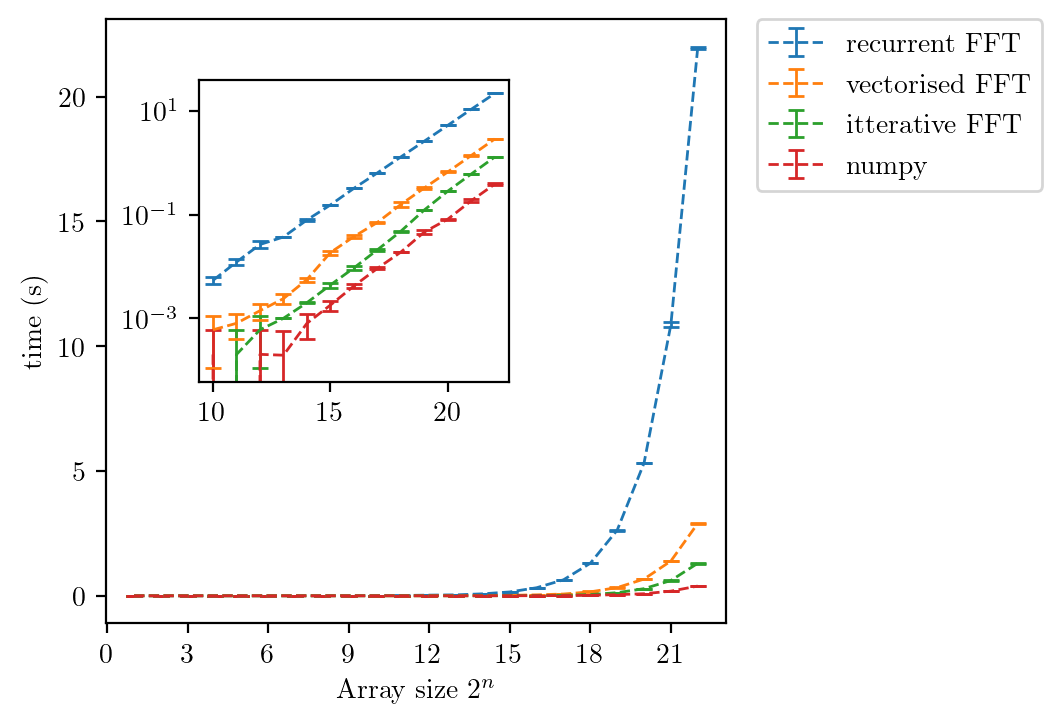

In [3]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)

FFT_timing = df_serial['FFT_timing']
FFT_error = df_serial['FFT_error']

ax.errorbar(range(1,len(FFT_timing)+1), FFT_timing, 
          yerr=FFT_error, label = 'recurrent FFT',
          capsize=3, lw=1, ls='--')

FFTv_timing = df_serial['FFTv_timing']
FFTv_error = df_serial['FFTv_error']

ax.errorbar(range(1,len(FFTv_timing)+1), FFTv_timing, 
          yerr=FFTv_error, label = 'vectorised FFT',
          capsize=3, lw=1, ls='--')

FFT_itt_timing = df_serial['FFT_itt_timing']
FFT_itt_error = df_serial['FFT_itt_error']

ax.errorbar(range(1,len(FFT_itt_timing)+1), FFT_itt_timing, 
          yerr=FFT_itt_error, label = 'itterative FFT',
          capsize=3, lw=1, ls='--')

FFT_np_timing = df_serial['FFT_np_timing']
FFT_np_error = df_serial['FFT_np_error']

ax.errorbar(range(1,len(FFT_np_timing)+1), FFT_np_timing, 
          yerr=FFT_np_error, label = 'numpy',
          capsize=3, lw=1, ls='--')

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.15, 0.4, 0.5, 0.5])
ax2.set_axes_locator(ip)

ax2.set_yscale('log')
yaxis = df_serial['array_power'].iloc[9:]

ax2.errorbar(yaxis, FFT_timing.iloc[9:], 
          yerr=FFT_error.iloc[9:], label = 'recurrent FFT',
          capsize=3, lw=1, ls='--')

ax2.errorbar(yaxis, FFTv_timing.iloc[9:], 
          yerr=FFTv_error.iloc[9:], label = 'vectorised FFT',
          capsize=3, lw=1, ls='--')

ax2.errorbar(yaxis, FFT_itt_timing.iloc[9:], 
          yerr=FFT_itt_error.iloc[9:], label = 'itterative FFT',
          capsize=3, lw=1, ls='--')

ax2.errorbar(yaxis, FFT_np_timing.iloc[9:], 
          yerr=FFT_np_error.iloc[9:], label = 'numpy',
          capsize=3, lw=1, ls='--')


ax.set_ylabel('time (s)')
ax.set_xlabel('Array size $2^{n}$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# fig.savefig('images\sequential_timing.pdf')

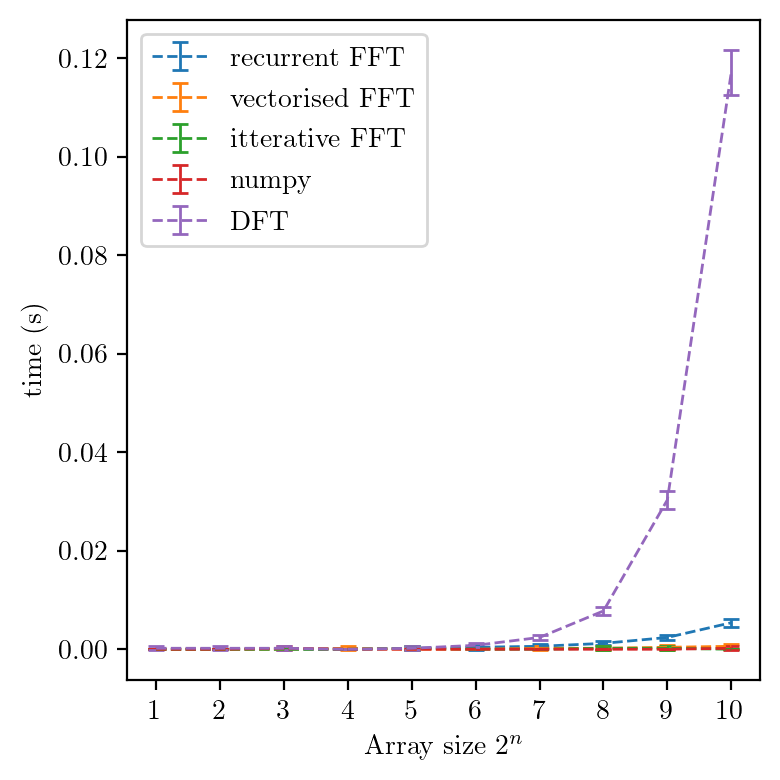

In [4]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)

DFT_timing = df_serial['DFT_timing'].iloc[:10]
DFT_error = df_serial['DFT_error'].iloc[:10]

ax.errorbar(range(1,len(DFT_timing)+1), FFT_timing.iloc[:10], 
          yerr=FFT_error.iloc[:10], label = 'recurrent FFT',
          capsize=3, lw=1, ls='--')


ax.errorbar(range(1,len(DFT_timing)+1), FFTv_timing.iloc[:10], 
          yerr=FFTv_error.iloc[:10], label = 'vectorised FFT',
          capsize=3, lw=1, ls='--')

ax.errorbar(range(1,len(DFT_timing)+1), FFT_itt_timing.iloc[:10], 
          yerr=FFT_itt_error.iloc[:10], label = 'itterative FFT',
          capsize=3, lw=1, ls='--')

ax.errorbar(range(1,len(DFT_timing)+1), FFT_np_timing.iloc[:10], 
          yerr=FFT_np_error.iloc[:10], label = 'numpy',
          capsize=3, lw=1, ls='--')

ax.errorbar(range(1,len(DFT_timing)+1), DFT_timing.iloc[:10], 
              yerr=DFT_error.iloc[:10], label = 'DFT',
              capsize=3, lw=1, ls='--')

ax.legend()
ax.set_ylabel('time (s)')
ax.set_xlabel('Array size $2^{n}$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
# fig.savefig('images\sequential_dft.pdf')

C:\Users\user\.conda\envs\tf\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

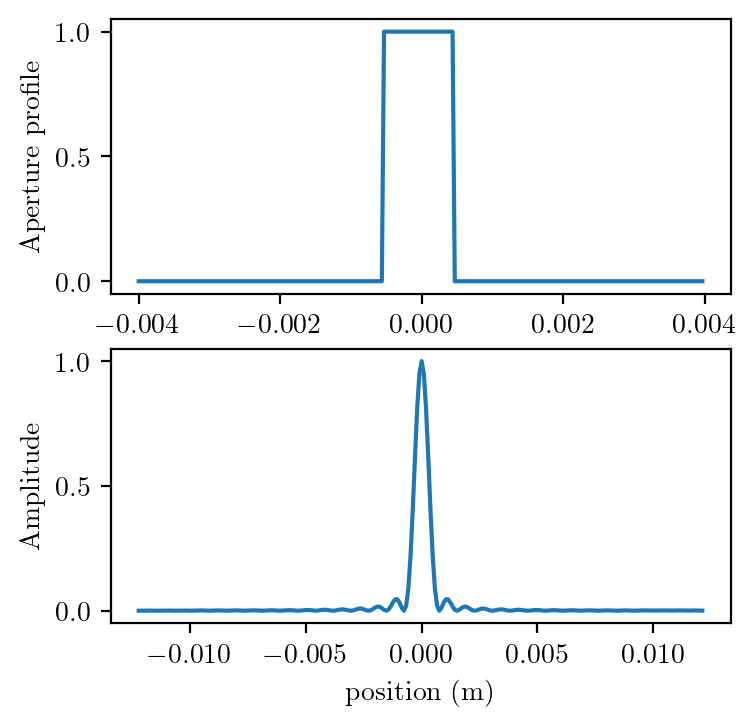

In [5]:
fig,axes = plt.subplots(nrows=2, figsize=(4,4), dpi=200)
axes = axes.flatten()

N = 2 ** 8 #Create x array
apeture_N = N / 8

aperture_size = 0.001 # 1mm
dx = aperture_size / apeture_N
wavelength = 0.6e-6#micro meters
wavenumber = 2 * np.pi / wavelength
distance = 1 #meters
x = dx * (np.arange(N) - N / 2)
scale = 2 * np.pi * aperture_size / (wavelength * distance)

aperture_start = int((N / 2) - 1 - apeture_N / 2)
aperture_end = int((N / 2) -1 + apeture_N / 2)

y = np.zeros(N)
y[aperture_start : aperture_end] = 1
axes[0].plot(x, y)
axes[0].set_xlabel('position (m)')
axes[0].set_ylabel('Aperture profile')

X = FFT_vec(y) 
X = np.fft.fftshift(X) # swaps first and second half of array

f = (1 / scale) * (np.arange(N) - N / 2)

power = X * np.conj(X)
power = power / np.max(power)

axes[1].plot(f, power)
axes[1].set_xlabel('position (m)')
axes[1].set_ylabel('Amplitude')
# fig.savefig('images\diffraction.pdf')

In [6]:
df_par_2 = pd.read_pickle('results\parallel_fft_timing_2.pkl')
df_par_2['numprocesses'] = 2
df_par_4 = pd.read_pickle('results\parallel_fft_timing_4.pkl')
df_par_4['numprocesses'] = 4
df_par_6 = pd.read_pickle('results\parallel_fft_timing_6.pkl')
df_par_6['numprocesses'] = 6
df_par_8 = pd.read_pickle('results\parallel_fft_timing_8.pkl')
df_par_8['numprocesses'] = 8
df_par_10 = pd.read_pickle('results\parallel_fft_timing_10.pkl')
df_par_10['numprocesses'] = 10
df_par_12 = pd.read_pickle('results\parallel_fft_timing_12.pkl')
df_par_12['numprocesses'] = 12
df_par_14 = pd.read_pickle('results\parallel_fft_timing_14.pkl')
df_par_14['numprocesses'] = 14
df_par_16 = pd.read_pickle('results\parallel_fft_timing_16.pkl')
df_par_16['numprocesses'] = 16

DF = [df_par_2, df_par_4, df_par_6, df_par_8, df_par_10, df_par_12, df_par_14, df_par_16]

Text(0, 0.5, 'Efficiency $\\eta$')

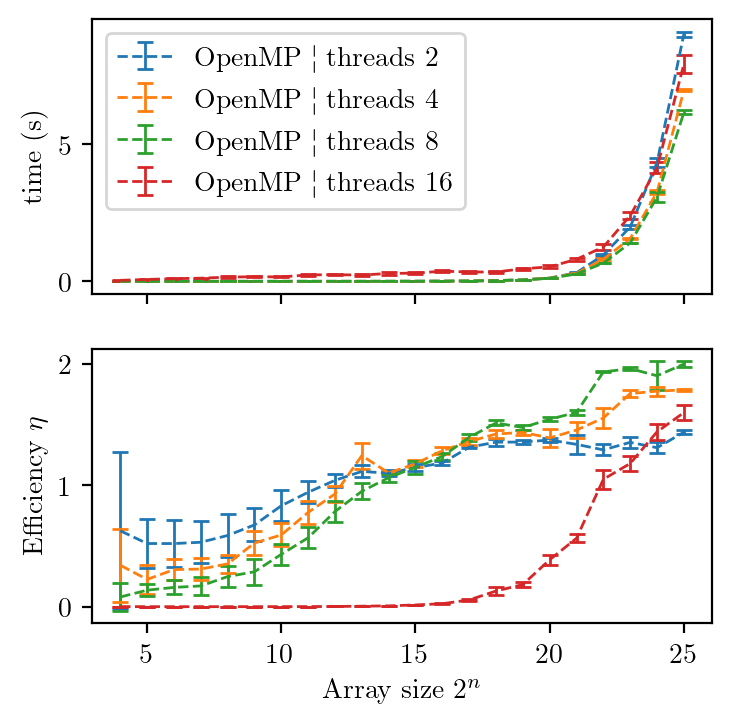

In [7]:
sample_df = [df_par_2, df_par_4, df_par_8, df_par_16]
colors = ['tab:blue', 'tab:orange' ,'tab:green', 'tab:red']

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(4,4), dpi=200)
axes = axes.flatten()

for idx, df in enumerate(sample_df):
    Color = colors[idx]
    
    yaxis = df['array_power']
    numprocesses = df['numprocesses'].iloc[0]
    
    axes[0].errorbar(yaxis, df['FFT_par_c_timing'],
          yerr=df['FFT_par_c_error'], label = 'OpenMP ¦ threads {}'.format(numprocesses),
          color=Color, capsize=3, lw=1, ls='--')
    
    
    axes[1].errorbar(yaxis, df['FFT_par_c_eff'], yerr=df['FFT_par_c_eff_error'], color=Color,
                capsize=3, lw=1, ls='--')
    

axes[0].legend()
axes[0].set_ylabel('time (s)')
axes[1].set_xlabel('Array size $2^{n}$')
axes[1].set_ylabel('Efficiency $\eta$')


OSError: [Errno 22] Invalid argument: 'images\\efficency_2.png'

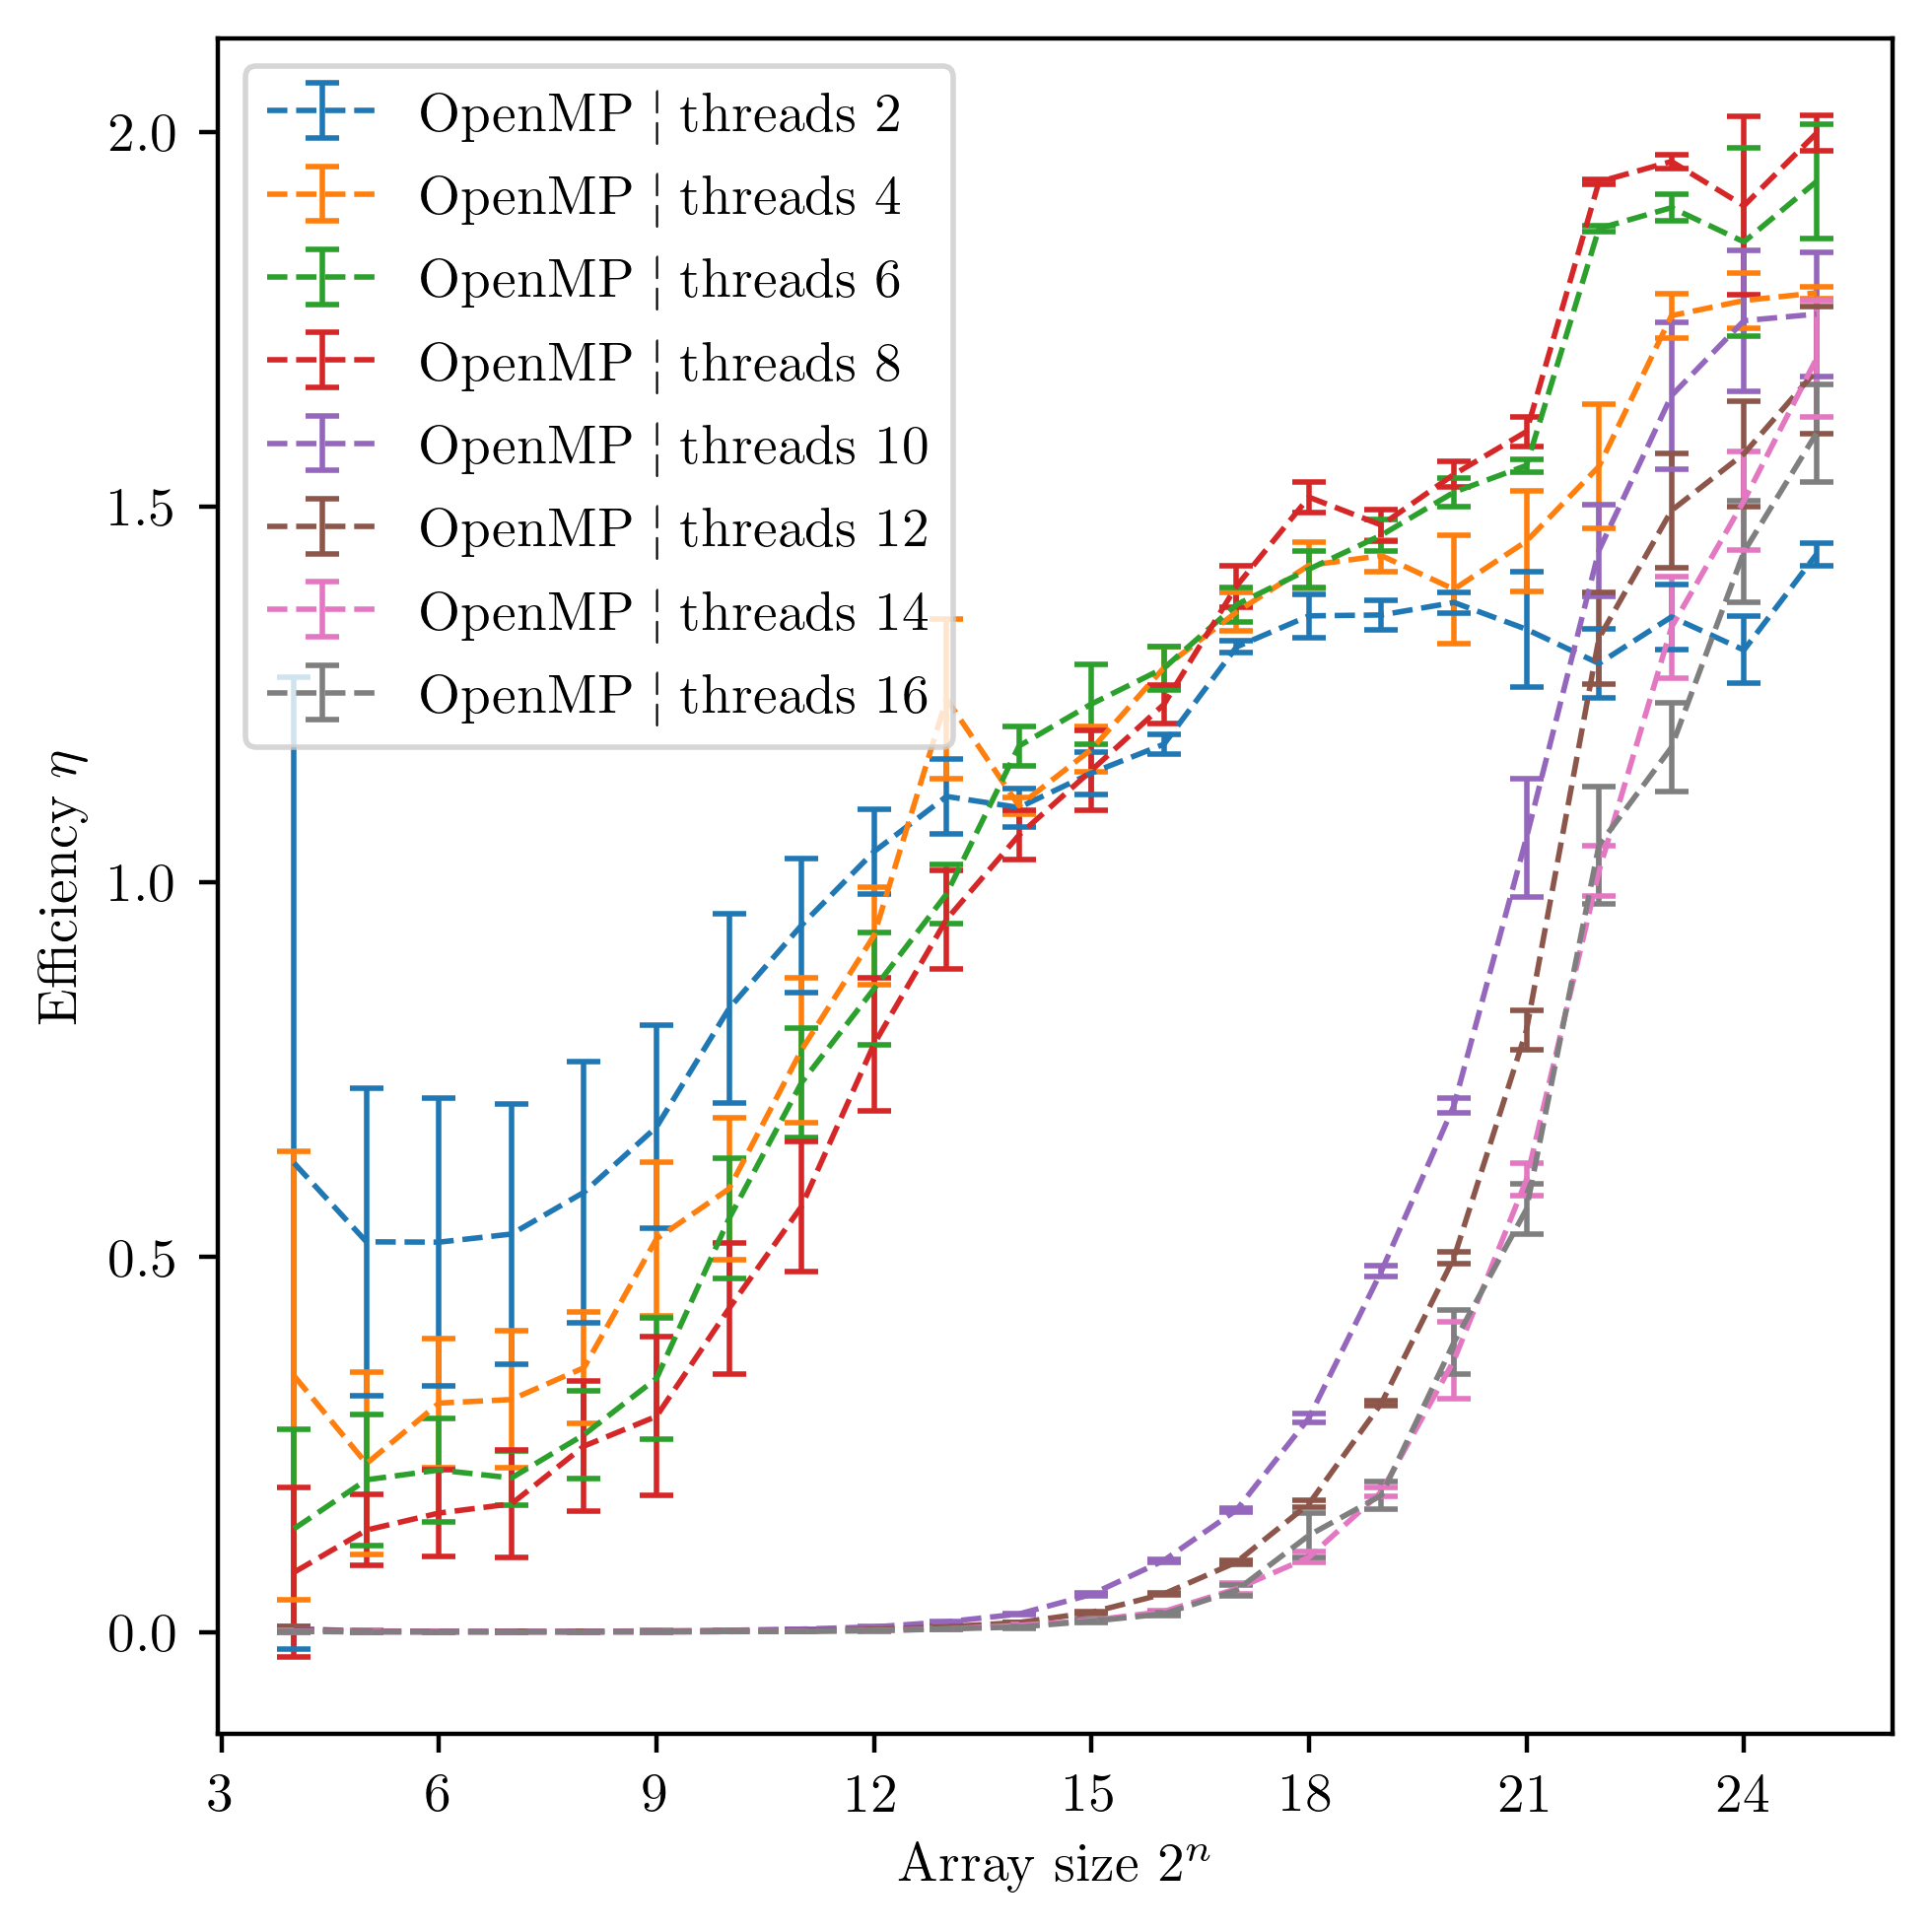

In [8]:
fig, ax = plt.subplots(figsize=(5,5), dpi=400)

for idx, df in enumerate(DF):
    
    yaxis = df['array_power']
    numprocesses = df['numprocesses'].iloc[0]    
    
    ax.errorbar(yaxis, df['FFT_par_c_eff'], yerr=df['FFT_par_c_eff_error'],
                label = 'OpenMP ¦ threads {}'.format(numprocesses), capsize=3, lw=1, ls='--')
    
ax.legend()
ax.set_xlabel('Array size $2^{n}$')
ax.set_ylabel('Efficiency $\eta$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
# fig.savefig('images\\efficency_2.png')

In [17]:
print(df_serial['array_power'].iloc[-1], df_serial['FFTv_timing'].iloc[-1],df_serial['FFTv_error'].iloc[-1])

22.0 2.8977335929870605 0.012328506727729161


In [ ]:
fig, ax = plt.subplots(figsize=(5,5), dpi=400)

for idx, df in enumerate(DF):
    
    yaxis = df['array_power']
    numprocesses = df['numprocesses'].iloc[0]    
    
    ax.errorbar(yaxis, df['FFT_par_c_eff'], yerr=df['FFT_par_c_eff_error'],
                label = 'OpenMP ¦ threads {}'.format(numprocesses), capsize=3, lw=1, ls='--')
    
ax.legend()
ax.set_xlabel('Array size $2^{n}$')
ax.set_ylabel('Efficiency $\eta$')
ax.set_yscale('log')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
# fig.savefig('images\\efficency_log_2.png')

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), dpi=400)

for idx, df in enumerate(DF):
    
    yaxis = df['array_power']
    numprocesses = df['numprocesses'].iloc[0]    
    
    ax.errorbar(yaxis, df['FFT_MPI_eff'], yerr=df['FFT_MPI_eff_error'],
                label = 'MPI SBM ¦ cores {}'.format(numprocesses), capsize=3, lw=1, ls='--')
    
ax.legend()
ax.set_xlabel('Array size $2^{n}$')
ax.set_ylabel('Efficiency $\eta$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
# fig.savefig('images\efficency_SBM_2.png')

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), dpi=400)

for idx, df in enumerate(DF):
    numprocesses = df['numprocesses'].iloc[0]  
    
    if np.log2(numprocesses) % 1 > 0:
        pass
    else:
        yaxis = df['array_power']
  

        ax.errorbar(yaxis, df['FFT_MPI_CBM_eff'], yerr=df['FFT_MPI_CBM_eff_error'],
                    label = 'MPI CBM ¦ cores {}'.format(numprocesses), capsize=3, lw=1, ls='--')
    
ax.legend()
ax.set_xlabel('Array size $2^{n}$')
ax.set_ylabel('Efficiency $\eta$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
# fig.savefig('images\efficency_CBM_2.png')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)

y_axis = df_par_2['array_power']

FFT_par_c_timing = df_par_8['FFT_par_c_timing']
FFT_par_c_error = df_par_8['FFT_par_c_error']

ax.errorbar(y_axis, FFT_par_c_timing, 
          yerr=FFT_par_c_error, label = 'shared memory FFT',
          capsize=3, lw=1, ls='--')

FFT_MPI_timing = df_par_8['FFT_MPI_timing']
FFT_MPI_error = df_par_8['FFT_MPI_error']

ax.errorbar(y_axis, FFT_MPI_timing, 
          yerr=FFT_MPI_error, label = 'distributed SM FFT',
          capsize=3, lw=1, ls='--')


FFT_MPI_CBM_timing = df_par_8['FFT_MPI_CBM_timing']
FFT_MPI_CBM_error = df_par_8['FFT_MPI_CBM_error']

ax.errorbar(y_axis, FFT_MPI_CBM_timing, 
          yerr=FFT_MPI_CBM_error, label = 'distributed CBM FFT',
          capsize=3, lw=1, ls='--')

FFT_itt_timing = df_serial['FFT_itt_timing'].iloc[3:]
FFT_itt_error = df_serial['FFT_itt_error'].iloc[3:]

ax.errorbar(y_axis, FFT_itt_timing, 
          yerr=FFT_itt_error, label = 'itterative FFT',
          capsize=3, lw=1, ls='--')

FFT_np_timing = df_serial['FFT_np_timing'].iloc[3:]
FFT_np_error = df_serial['FFT_np_error'].iloc[3:]

ax.errorbar(y_axis, FFT_np_timing, 
          yerr=FFT_np_error, label = 'numpy',
          capsize=3, lw=1, ls='--')

ax.set_ylabel('time (s)')
ax.set_xlabel('Array size $2^{n}$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()

In [ ]:
df_stage_timing_1 = pd.read_pickle('results\stage_timing_thread_1.pkl')
df_stage_timing_1['numthreads'] = 1
df_stage_timing_2 = pd.read_pickle('results\stage_timing_thread_2.pkl')
df_stage_timing_2['numthreads'] = 2
df_stage_timing_4 = pd.read_pickle('results\stage_timing_thread_4.pkl')
df_stage_timing_4['numthreads'] = 4
df_stage_timing_6 = pd.read_pickle('results\stage_timing_thread_6.pkl')
df_stage_timing_6['numthreads'] = 6
df_stage_timing_8 = pd.read_pickle('results\stage_timing_thread_8.pkl')
df_stage_timing_8['numthreads'] = 8
df_stage_timing_10 = pd.read_pickle('results\stage_timing_thread_10.pkl')
df_stage_timing_10['numthreads'] = 10
df_stage_timing_12 = pd.read_pickle('results\stage_timing_thread_12.pkl')
df_stage_timing_12['numthreads'] = 12
df_stage_timing_14 = pd.read_pickle('results\stage_timing_thread_14.pkl')
df_stage_timing_14['numthreads'] = 14
df_stage_timing_16 = pd.read_pickle('results\stage_timing_thread_16.pkl')
df_stage_timing_16['numthreads'] = 16

DF_stage_timing = [df_stage_timing_1, df_stage_timing_2, df_stage_timing_4, df_stage_timing_6,
                  df_stage_timing_8, df_stage_timing_10, df_stage_timing_12, df_stage_timing_14,
                  df_stage_timing_16]

In [ ]:
df_stage_timing_1.tail()

In [ ]:
select_df = [df_stage_timing_1, df_stage_timing_4, df_stage_timing_16]
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
subproblemsize = 2 ** 22 / (2 ** np.arange(22))

for idx, df in enumerate(select_df):
    numthreads = int(4 ** idx)
    ax.plot(df['stage_number'], df['stage_timing_2'], label = 'method 1 ¦ {} threads'.format(numthreads), ls ='--')

for idx, df in enumerate(select_df):
    numthreads = int(4 ** idx)
    ax.plot(df['stage_number'], df['stage_timing_1'], label = 'method 2 ¦ {} threads'.format(numthreads))
    
ax.set_yscale('log')
ax.set_xlabel('Stage number')
ax.set_ylabel('time (s)')
ax.legend()
fig.tight_layout()
# fig.savefig('images\stage_timing.pdf')